<a href="https://colab.research.google.com/github/Krishgoenka/Heart_attack_prediction_model/blob/main/Heart_attack_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [101]:
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")

In [102]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [103]:


# Step 2: Drop irrelevant columns (columns that contain non-numeric values like 'BMW7812')
# Detect non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()

# Manually check if any of these should be removed (like IDs)
columns_to_remove = [col for col in non_numeric_cols if df[col].nunique() > 50]  # Assuming ID-like columns have many unique values
df.drop(columns=columns_to_remove, axis=1, inplace=True)

# Step 3: Convert 'Sex' column (Male/Female → 0/1)
if 'Sex' in df.columns:
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])  # Male -> 1, Female -> 0

# Step 4: Convert 'Blood Pressure' from '120/80' format to average
def clean_blood_pressure(bp):
    if isinstance(bp, str) and '/' in bp:
        try:
            systolic, diastolic = map(int, bp.split('/'))
            return (systolic + diastolic) / 2
        except:
            return None  # If it fails, set to None
    return bp

if 'Blood Pressure' in df.columns:
    df['Blood Pressure'] = df['Blood Pressure'].apply(clean_blood_pressure)

# Step 5: Handle categorical data (convert categorical columns to numeric)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 6: Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can change strategy to 'median' if needed
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 7: Save the cleaned dataset
df.to_csv('cleaned2_heart_attack_data.csv', index=False)

print("✅ Cleaned CSV file saved as 'cleaned_heart_attack_data.csv'")


✅ Cleaned CSV file saved as 'cleaned_heart_attack_data.csv'


In [104]:
df=pd.read_csv("/content/cleaned2_heart_attack_data.csv")

In [105]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67.0,1.0,208.0,72.0,0.0,0.0,1.0,0.0,0.0,4.168189,...,6.615001,261404.0,31.251233,286.0,0.0,6.0,0.0,5.0,1.0,0.0
1,21.0,1.0,389.0,98.0,1.0,1.0,1.0,1.0,1.0,1.813242,...,4.963459,285768.0,27.194973,235.0,1.0,7.0,3.0,4.0,0.0,0.0
2,21.0,0.0,324.0,72.0,1.0,0.0,0.0,0.0,0.0,2.078353,...,9.463426,235282.0,28.176571,587.0,4.0,4.0,6.0,3.0,0.0,0.0
3,84.0,1.0,383.0,73.0,1.0,1.0,1.0,0.0,1.0,9.828130,...,7.648981,125640.0,36.464704,378.0,3.0,4.0,3.0,4.0,0.0,0.0
4,66.0,1.0,318.0,93.0,1.0,1.0,1.0,1.0,0.0,5.804299,...,1.514821,160555.0,21.809144,231.0,1.0,5.0,16.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60.0,1.0,121.0,61.0,1.0,1.0,1.0,0.0,1.0,7.917342,...,10.806373,235420.0,19.655895,67.0,7.0,7.0,16.0,1.0,0.0,0.0
8759,28.0,0.0,120.0,73.0,1.0,0.0,0.0,1.0,0.0,16.558426,...,3.833038,217881.0,23.993866,617.0,4.0,9.0,3.0,4.0,0.0,0.0
8760,47.0,1.0,250.0,105.0,0.0,1.0,1.0,1.0,1.0,3.148438,...,2.375214,36998.0,35.406146,527.0,4.0,4.0,2.0,5.0,1.0,1.0
8761,36.0,1.0,178.0,60.0,1.0,0.0,1.0,0.0,0.0,3.789950,...,0.029104,209943.0,27.294020,114.0,2.0,8.0,2.0,5.0,1.0,0.0


In [106]:
df.shape

(8763, 24)

In [107]:
print("Missing values\n",df.isnull().sum())

Missing values
 Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [108]:
X = df.drop(columns=['Heart Attack Risk']) # all features
y = df['Heart Attack Risk'] # outcome only

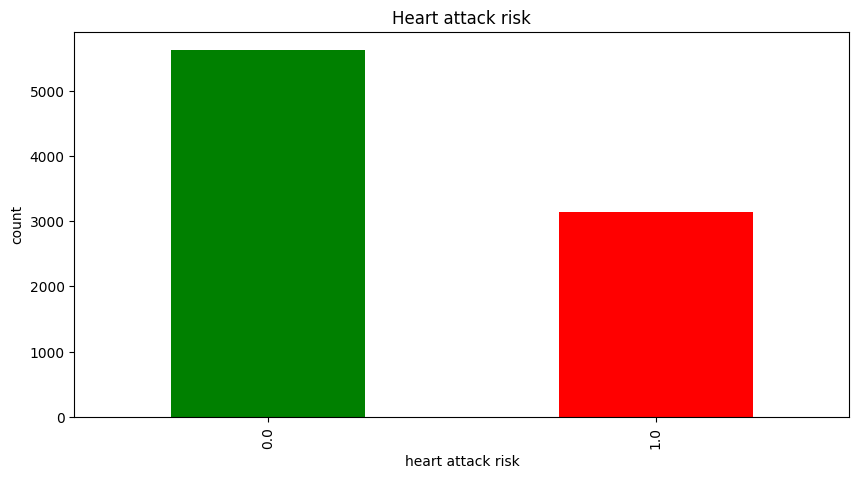

In [109]:
counts =df['Heart Attack Risk'].value_counts()
counts.plot(kind='bar',figsize=(10,5),color=['green','red'])
plt.xlabel("heart attack risk")
plt.ylabel("count")
plt.title("Heart attack risk")
plt.show()

In [110]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
x_train.shape,x_test.shape

((7010, 23), (1753, 23))

In [112]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [113]:
# Train an SVM classifier
model = SVC(kernel='linear',gamma='scale', C=0.1)
model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = model.predict(x_test_scaled)


In [114]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nModel Accuracy: {accuracy:.2f}%")


Model Accuracy: 64.18%


**Next Step to increase accuracy , might be using differt approach or different algorith**